# Linear Regression 

In [1]:
import pandas as pd #### used for dataframe manipulations
import numpy as np
import seaborn as sns ### plotting
import matplotlib.pyplot as plt ### plotting

In [ ]:
##### Given the characteristics about the loan and the loan applicant build a model to predict the interest rate that the bank 
##### should charge the person

In [2]:
train_file='loan_data_train.csv'
test_file='loan_data_test.csv'

ld_train=pd.read_csv(train_file)
ld_test=pd.read_csv(test_file)               

In [3]:
#### Objective: Given the features about the applicant and the loan itself can we predict the rate of interest for the loan 
#### objective : Supervised machine learning algorithm, regression problem -- Linear Regression
ld_train.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [4]:
ld_test.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20093,5000,5000,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year
1,62445,18000,18000,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years
2,65248,7200,7200,60 months,debt_consolidation,25.16%,LA,MORTGAGE,3750.00,750-754,13,7283,0,6 years
3,81822,7200,7200,36 months,debt_consolidation,17.27%,NY,MORTGAGE,3416.67,790-794,14,4838,0,10+ years
4,57923,22000,22000,60 months,debt_consolidation,18.28%,MI,MORTGAGE,6083.33,720-724,9,20181,0,8 years


In [5]:
#### Sanity check ####

### 1. Check for logical dependency - True
### 2. Check for data adequacy - False (neglect)

ld_train.shape, ld_test.shape

((2200, 15), (300, 14))

In [ ]:
### EDA AND PREPROCESSING

In [ ]:
#### Insights ####

# ID could be removed ##### Unwanted column!
# Amount.Requested should have been a numeric column, check for the reasons for it being a object column and convert it to numeric
# Interest rate column remove the % sign and check if that converts the column to numeric 
# Loan length do a bit of analysis
# Loan Purpose (Truly object) - convert it to numeric
# Debt to Income ratio - Remove the % sign and convert to numeric 
# State (Truly object) - Convert to numeric
# Home Ownership (Truly Object) - Convert to numeric
# Fico range - Convert into a numeric column
# Open credit lines - Convert to numeric
# Revolving credit balance. - Convert to numeric
# Employment length - Convert to numeric


In [7]:
# lets combine the data for data prep

ld_test['Interest.Rate']= np.nan

ld_train['coming_from']='train'

ld_test['coming_from']='test'

ld_test=ld_test[ld_train.columns] ### reordering the columns of test dataset in the order of train dataset

ld_all=pd.concat([ld_train,ld_test],axis=0) ### row wise concatenation

In [8]:
ld_all.shape, ld_train.shape, ld_test.shape

((2500, 16), (2200, 16), (300, 16))

In [9]:
ld_all.dtypes ### data types of all the columns

ID                                float64
Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
coming_from                        object
dtype: object

In [ ]:
# ID : drop 
# Interest Rate , Debt to income ratio : remove % and then to numeric
# Amount.Requested , 'Open.CREDIT.Lines','Revolving.CREDIT.Balance': convert it to numeric 
# FICO.Range : replace it by a numeric column which is average of the range
# Employment Length : convert to number
# Loan Lenth, Loan Purpose , State , Home ownership: dummies for categories with good occurence rate

In [10]:
### Dropping irrelevant columns #####
ld_all.drop(['ID'],axis=1,inplace=True)

In [ ]:
ld_all.dtypes

Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
coming_from                        object
dtype: object

In [11]:
ld_all['Interest.Rate'].str.replace('%','')

0      18.49
1      17.27
2      14.33
3      16.29
4      12.23
       ...  
295      NaN
296      NaN
297      NaN
298      NaN
299      NaN
Name: Interest.Rate, Length: 2500, dtype: object

In [12]:
###### Remove % sign and convert to numeric ####

#ld_all['Interest.Rate'] = ld_all["Interest.Rate"].str.replace('%', '')
#ld_all['Debt.To.Income.Ratio'] = ld_all["Debt.To.Income.Ratio"].str.replace('%', '')

for column in ['Interest.Rate','Debt.To.Income.Ratio']:
    ld_all[column] = ld_all[column].str.replace('%', '')

In [13]:
ld_all.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,coming_from
0,25000,25000,18.49,60 months,debt_consolidation,27.56,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,train
1,19750,19750,17.27,60 months,debt_consolidation,13.39,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,train
2,2100,2100,14.33,36 months,major_purchase,3.50,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,train
3,28000,28000,16.29,36 months,credit_card,19.62,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,train
4,24250,17431.82,12.23,60 months,credit_card,23.79,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,train


In [14]:
ld_all.dtypes

Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
coming_from                        object
dtype: object

In [15]:
def get_non_numeric(series):
  non_numeric_elements = []
  for elem in series:
    try:
      float(elem)
    except:
      non_numeric_elements.append(elem)
  return(non_numeric_elements)

In [16]:
for col in ['Amount.Requested','Amount.Funded.By.Investors', 'Interest.Rate', 
            'Debt.To.Income.Ratio', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance']:
    non_numeric_elems = get_non_numeric(ld_all[col])
    print('*********************************')
    print('Column :', col)
    print('Non numeric elements :', non_numeric_elems)

*********************************
Column : Amount.Requested
Non numeric elements : ['.', '.', '.', '.']
*********************************
Column : Amount.Funded.By.Investors
Non numeric elements : ['.', '.', '.', '.']
*********************************
Column : Interest.Rate
Non numeric elements : []
*********************************
Column : Debt.To.Income.Ratio
Non numeric elements : []
*********************************
Column : Open.CREDIT.Lines
Non numeric elements : ['.', '.', '.', '.', '.']
*********************************
Column : Revolving.CREDIT.Balance
Non numeric elements : ['.', '.']


In [17]:
##### Conversion to Numeric columns ######
##### Non Numeric value to be replaced with NaN 

for col in ['Amount.Requested','Amount.Funded.By.Investors',
            'Open.CREDIT.Lines','Revolving.CREDIT.Balance','Interest.Rate','Debt.To.Income.Ratio']:
    ld_all[col]=pd.to_numeric(ld_all[col], errors='coerce')

In [18]:
ld_all.dtypes

Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
coming_from                        object
dtype: object

In [ ]:
ld_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2495 non-null   float64
 1   Amount.Funded.By.Investors      2495 non-null   float64
 2   Interest.Rate                   2200 non-null   float64
 3   Loan.Length                     2499 non-null   object 
 4   Loan.Purpose                    2499 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   float64
 6   State                           2499 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2497 non-null   float64
 9   FICO.Range                      2500 non-null   object 
 10  Open.CREDIT.Lines               2491 non-null   float64
 11  Revolving.CREDIT.Balance        2495 non-null   float64
 12  Inquiries.in.the.Last.6.Months  249

In [19]:
k = ld_all['FICO.Range'].str.split("-",expand=True)

In [20]:
k

,0,1
0,720,724
1,710,714
2,690,694
3,710,714
4,730,734
...,...,...
295,705,709
296,705,709
297,670,674
298,675,679


In [21]:
k.columns = ['Min_Fico', 'Max_Fico']

In [22]:
k['Min_Fico'] = pd.to_numeric(k['Min_Fico'])
k['Max_Fico'] = pd.to_numeric(k['Max_Fico'])

In [23]:
k['Avg_Fico'] = (k['Min_Fico'] + k['Max_Fico'])/2

In [24]:
k

,Min_Fico,Max_Fico,Avg_Fico
0,720,724,722.0
1,710,714,712.0
2,690,694,692.0
3,710,714,712.0
4,730,734,732.0
...,...,...,...
295,705,709,707.0
296,705,709,707.0
297,670,674,672.0
298,675,679,677.0


In [25]:
##### Treating the FICO Range ######

ld_all['Fico_Score'] = k['Avg_Fico']

ld_all.drop('FICO.Range',axis=1, inplace=True)

In [26]:
ld_all.dtypes

Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
coming_from                        object
Fico_Score                        float64
dtype: object

In [27]:
ld_all.loc[ld_all['coming_from']=='train','Home.Ownership'].value_counts()

MORTGAGE    1018
RENT         999
OWN          177
OTHER          4
NONE           1
Name: Home.Ownership, dtype: int64

In [28]:
###### Number of missing values in home owner ship ######
n_missing = 2500 - np.sum(ld_all['Home.Ownership'].value_counts())
n_missing

1

In [31]:
####### Fill the missing value in home ownership ######

ld_all.loc[ld_all['Home.Ownership'].isna(),'Home.Ownership'] = 'MORTGAGE'

<AxesSubplot:xlabel='Home.Ownership', ylabel='Interest.Rate'>

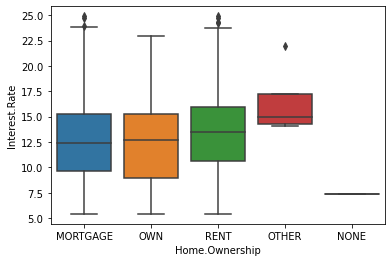

In [32]:
import seaborn as sns

sns.boxplot(y = ld_all.loc[ld_all['coming_from']=='train', 'Interest.Rate'], x= ld_all.loc[ld_all['coming_from']=='train', 'Home.Ownership'])

In [33]:
ld_all['Home.Ownership'].value_counts()

ld_all.loc[ld_all['Home.Ownership'].isin(['OTHER','NONE']),'Home.Ownership'] = 'MORTGAGE'

k = pd.get_dummies(ld_all['Home.Ownership'], prefix = 'HO')

ld_all.drop(['Home.Ownership'],axis=1,inplace=True) #### del ld_all['Home.Ownership']

ld_all = pd.concat([ld_all,k],axis=1)

In [34]:
ld_all

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,coming_from,Fico_Score,HO_MORTGAGE,HO_OWN,HO_RENT
0,25000.0,25000.00,18.49,60 months,debt_consolidation,27.56,VA,8606.56,11.0,15210.0,3.0,5 years,train,722.0,1,0,0
1,19750.0,19750.00,17.27,60 months,debt_consolidation,13.39,NY,6737.50,14.0,19070.0,3.0,4 years,train,712.0,1,0,0
2,2100.0,2100.00,14.33,36 months,major_purchase,3.50,LA,1000.00,13.0,893.0,1.0,< 1 year,train,692.0,0,1,0
3,28000.0,28000.00,16.29,36 months,credit_card,19.62,NV,7083.33,12.0,38194.0,1.0,10+ years,train,712.0,1,0,0
4,24250.0,17431.82,12.23,60 months,credit_card,23.79,OH,5833.33,6.0,31061.0,2.0,10+ years,train,732.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,12000.0,11975.00,NaN,60 months,home_improvement,13.91,NV,7083.33,7.0,3923.0,2.0,7 years,test,707.0,1,0,0
296,5000.0,5000.00,NaN,36 months,debt_consolidation,17.22,CA,4000.00,10.0,6023.0,0.0,10+ years,test,707.0,0,1,0
297,4375.0,4375.00,NaN,36 months,credit_card,9.09,CA,2916.67,9.0,6944.0,2.0,6 years,test,672.0,0,0,1
298,13600.0,13600.00,NaN,60 months,credit_card,12.85,MN,5651.33,13.0,24383.0,0.0,10+ years,test,677.0,0,0,1


In [35]:
ld_all.dtypes

Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Monthly.Income                    float64
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
coming_from                        object
Fico_Score                        float64
HO_MORTGAGE                         uint8
HO_OWN                              uint8
HO_RENT                             uint8
dtype: object

In [36]:
ld_all.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,coming_from,Fico_Score,HO_MORTGAGE,HO_OWN,HO_RENT
0,25000.0,25000.00,18.49,60 months,debt_consolidation,27.56,VA,8606.56,11.0,15210.0,3.0,5 years,train,722.0,1,0,0
1,19750.0,19750.00,17.27,60 months,debt_consolidation,13.39,NY,6737.50,14.0,19070.0,3.0,4 years,train,712.0,1,0,0
2,2100.0,2100.00,14.33,36 months,major_purchase,3.50,LA,1000.00,13.0,893.0,1.0,< 1 year,train,692.0,0,1,0
3,28000.0,28000.00,16.29,36 months,credit_card,19.62,NV,7083.33,12.0,38194.0,1.0,10+ years,train,712.0,1,0,0
4,24250.0,17431.82,12.23,60 months,credit_card,23.79,OH,5833.33,6.0,31061.0,2.0,10+ years,train,732.0,1,0,0


In [37]:
ld_all.loc[ld_all['coming_from']=='train', 'Loan.Purpose'].value_counts()

debt_consolidation    1147
credit_card            394
other                  174
home_improvement       135
major_purchase          84
small_business          80
car                     45
wedding                 35
medical                 26
moving                  25
house                   19
vacation                18
educational             14
renewable_energy         3
Name: Loan.Purpose, dtype: int64

<AxesSubplot:xlabel='Loan.Purpose', ylabel='Interest.Rate'>

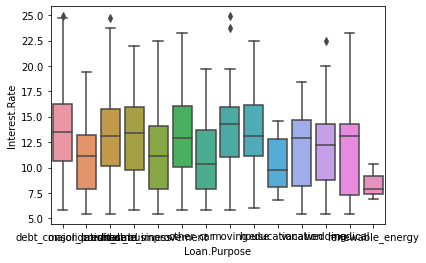

In [38]:
sns.boxplot(y = ld_all.loc[ld_all['coming_from']=='train', 'Interest.Rate'], x= ld_all.loc[ld_all['coming_from']=='train', 'Loan.Purpose'])

In [39]:
###### Number of missing values in home owner ship ######
n_missing = 2500 - np.sum(ld_all['Loan.Purpose'].value_counts())
n_missing

1

In [40]:
####### Fill the missing value in home ownership ######

ld_all.loc[ld_all['Loan.Purpose'].isna(),'Loan.Purpose'] = 'debt_consolidation'

In [41]:
#ld_all.loc[ld_all['Loan.Purpose']=='renewable_energy', 'Loan.Purpose'] = 'debt_consolidation'

k = pd.get_dummies(ld_all['Loan.Purpose'],prefix ='Loan_purpose')

ld_all.drop(['Loan.Purpose'],axis=1, inplace=True)

ld_all = pd.concat([ld_all,k],axis=1)

In [42]:
ld_all.dtypes

Amount.Requested                   float64
Amount.Funded.By.Investors         float64
Interest.Rate                      float64
Loan.Length                         object
Debt.To.Income.Ratio               float64
State                               object
Monthly.Income                     float64
Open.CREDIT.Lines                  float64
Revolving.CREDIT.Balance           float64
Inquiries.in.the.Last.6.Months     float64
Employment.Length                   object
coming_from                         object
Fico_Score                         float64
HO_MORTGAGE                          uint8
HO_OWN                               uint8
HO_RENT                              uint8
Loan_purpose_car                     uint8
Loan_purpose_credit_card             uint8
Loan_purpose_debt_consolidation      uint8
Loan_purpose_educational             uint8
Loan_purpose_home_improvement        uint8
Loan_purpose_house                   uint8
Loan_purpose_major_purchase          uint8
Loan_purpos

In [43]:
ld_all.loc[ld_all['coming_from']=='train','Employment.Length'].value_counts()

10+ years    575
< 1 year     229
2 years      217
3 years      203
5 years      181
4 years      162
1 year       159
6 years      134
7 years      109
8 years       95
9 years       66
.              1
Name: Employment.Length, dtype: int64

In [44]:
###### Number of missing values in Employment.Length ######
n_missing = 2500 - np.sum(ld_all['Employment.Length'].value_counts())
n_missing

78

In [45]:
ld_all.loc[ld_all['Employment.Length'].isna(),'coming_from'].value_counts()

train    69
test      9
Name: coming_from, dtype: int64

<AxesSubplot:xlabel='Employment.Length', ylabel='Interest.Rate'>

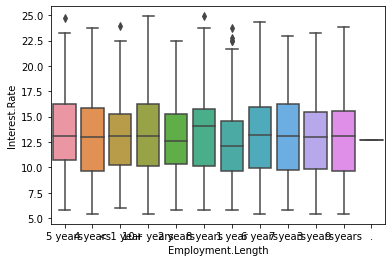

In [46]:
sns.boxplot(y = ld_all.loc[ld_all['coming_from']=='train', 'Interest.Rate'], x= ld_all.loc[ld_all['coming_from']=='train', 'Employment.Length'])

In [47]:
'''
ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('.',"10")

ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('years',"")

ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('year',"")

ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('10\+',"10")

ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('< 1',"0.5")

ld_all['Employment.Length'] = pd.to_numeric(ld_all['Employment.Length'],errors = 'coerce')
'''

ld_all.drop(['Employment.Length'], axis=1, inplace=True)

In [48]:
ld_all.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,State,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,...,Loan_purpose_home_improvement,Loan_purpose_house,Loan_purpose_major_purchase,Loan_purpose_medical,Loan_purpose_moving,Loan_purpose_other,Loan_purpose_renewable_energy,Loan_purpose_small_business,Loan_purpose_vacation,Loan_purpose_wedding
0,25000.0,25000.00,18.49,60 months,27.56,VA,8606.56,11.0,15210.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,19750.0,19750.00,17.27,60 months,13.39,NY,6737.50,14.0,19070.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,2100.0,2100.00,14.33,36 months,3.50,LA,1000.00,13.0,893.0,1.0,...,0,0,1,0,0,0,0,0,0,0
3,28000.0,28000.00,16.29,36 months,19.62,NV,7083.33,12.0,38194.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,24250.0,17431.82,12.23,60 months,23.79,OH,5833.33,6.0,31061.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
ld_all.dtypes

Amount.Requested                   float64
Amount.Funded.By.Investors         float64
Interest.Rate                      float64
Loan.Length                         object
Debt.To.Income.Ratio               float64
State                               object
Monthly.Income                     float64
Open.CREDIT.Lines                  float64
Revolving.CREDIT.Balance           float64
Inquiries.in.the.Last.6.Months     float64
coming_from                         object
Fico_Score                         float64
HO_MORTGAGE                          uint8
HO_OWN                               uint8
HO_RENT                              uint8
Loan_purpose_car                     uint8
Loan_purpose_credit_card             uint8
Loan_purpose_debt_consolidation      uint8
Loan_purpose_educational             uint8
Loan_purpose_home_improvement        uint8
Loan_purpose_house                   uint8
Loan_purpose_major_purchase          uint8
Loan_purpose_medical                 uint8
Loan_purpos

In [50]:
# Notice that to apply string function on pandas data frame columns you need to str attribute
cat_cols = ld_all.select_dtypes(['object']).columns

In [51]:
cat_cols

Index(['Loan.Length', 'State', 'coming_from'], dtype='object')

In [52]:
ld_all.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,State,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,...,Loan_purpose_home_improvement,Loan_purpose_house,Loan_purpose_major_purchase,Loan_purpose_medical,Loan_purpose_moving,Loan_purpose_other,Loan_purpose_renewable_energy,Loan_purpose_small_business,Loan_purpose_vacation,Loan_purpose_wedding
0,25000.0,25000.00,18.49,60 months,27.56,VA,8606.56,11.0,15210.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,19750.0,19750.00,17.27,60 months,13.39,NY,6737.50,14.0,19070.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,2100.0,2100.00,14.33,36 months,3.50,LA,1000.00,13.0,893.0,1.0,...,0,0,1,0,0,0,0,0,0,0
3,28000.0,28000.00,16.29,36 months,19.62,NV,7083.33,12.0,38194.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,24250.0,17431.82,12.23,60 months,23.79,OH,5833.33,6.0,31061.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ld_all['Loan.Length'].value_counts()

36 months    1950
60 months     548
.               1
Name: Loan.Length, dtype: int64

In [56]:
###### Number of missing values in Loan.Length ######
n_missing = 2500 - np.sum(ld_all['Loan.Length'].value_counts())
n_missing

0

In [57]:
ld_all.loc[ld_all['Loan.Length'].isna(), 'Loan.Length'] = '36 months'
ld_all.loc[ld_all['Loan.Length']=='.', 'Loan.Length'] = '36 months'

<AxesSubplot:xlabel='Loan.Length', ylabel='Interest.Rate'>

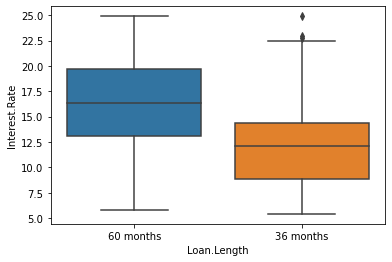

In [58]:
sns.boxplot(y = ld_all.loc[ld_all['coming_from']=='train', 'Interest.Rate'], x= ld_all.loc[ld_all['coming_from']=='train', 'Loan.Length'])

In [59]:
##### Loan.Length column #####

ld_all['Loan.Length'].value_counts()

k = pd.get_dummies(ld_all['Loan.Length'], prefix = 'LL')

ld_all.drop(['Loan.Length'], axis=1, inplace=True)

ld_all = pd.concat([ld_all, k], axis=1)

In [60]:
ld_all.dtypes

Amount.Requested                   float64
Amount.Funded.By.Investors         float64
Interest.Rate                      float64
Debt.To.Income.Ratio               float64
State                               object
Monthly.Income                     float64
Open.CREDIT.Lines                  float64
Revolving.CREDIT.Balance           float64
Inquiries.in.the.Last.6.Months     float64
coming_from                         object
Fico_Score                         float64
HO_MORTGAGE                          uint8
HO_OWN                               uint8
HO_RENT                              uint8
Loan_purpose_car                     uint8
Loan_purpose_credit_card             uint8
Loan_purpose_debt_consolidation      uint8
Loan_purpose_educational             uint8
Loan_purpose_home_improvement        uint8
Loan_purpose_house                   uint8
Loan_purpose_major_purchase          uint8
Loan_purpose_medical                 uint8
Loan_purpose_moving                  uint8
Loan_purpos

In [61]:
ld_all.shape

(2500, 30)

In [62]:
ld_all['State'].value_counts()

CA    433
NY    255
TX    174
FL    169
IL    101
GA     97
PA     96
NJ     94
VA     78
MA     73
OH     71
MD     68
NC     64
CO     61
WA     58
CT     50
AZ     46
MI     45
AL     38
MN     38
MO     33
NV     32
OR     30
SC     28
WI     26
KY     23
LA     22
OK     21
KS     21
UT     16
NH     15
RI     15
WV     14
AR     13
NM     13
HI     12
AK     11
DC     11
DE      8
MT      7
VT      5
WY      4
SD      4
IN      3
MS      1
.       1
IA      1
Name: State, dtype: int64

In [63]:
ld_all['State'].nunique()

47

In [64]:
state_freq = ld_all['State'].value_counts()

In [65]:
states_to_consider = list(state_freq.loc[state_freq>50].index)

In [66]:
states_to_consider

['CA',
 'NY',
 'TX',
 'FL',
 'IL',
 'GA',
 'PA',
 'NJ',
 'VA',
 'MA',
 'OH',
 'MD',
 'NC',
 'CO',
 'WA']

<AxesSubplot:xlabel='State', ylabel='Interest.Rate'>

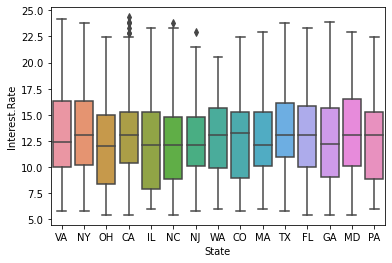

In [67]:
sns.boxplot(y = ld_all.loc[(ld_all['coming_from']=='train') & (ld_all['State'].isin(states_to_consider)), 'Interest.Rate'], 
            x= ld_all.loc[(ld_all['coming_from']=='train') & (ld_all['State'].isin(states_to_consider)), 'State'])

In [68]:
del ld_all['State'] ### Hypothesis testing!!!! (ANOVA)

In [69]:
ld_all.dtypes

Amount.Requested                   float64
Amount.Funded.By.Investors         float64
Interest.Rate                      float64
Debt.To.Income.Ratio               float64
Monthly.Income                     float64
Open.CREDIT.Lines                  float64
Revolving.CREDIT.Balance           float64
Inquiries.in.the.Last.6.Months     float64
coming_from                         object
Fico_Score                         float64
HO_MORTGAGE                          uint8
HO_OWN                               uint8
HO_RENT                              uint8
Loan_purpose_car                     uint8
Loan_purpose_credit_card             uint8
Loan_purpose_debt_consolidation      uint8
Loan_purpose_educational             uint8
Loan_purpose_home_improvement        uint8
Loan_purpose_house                   uint8
Loan_purpose_major_purchase          uint8
Loan_purpose_medical                 uint8
Loan_purpose_moving                  uint8
Loan_purpose_other                   uint8
Loan_purpos

In [ ]:
'''
# you can use following method if you want to ignore categories with too low frequencies ,
#in next section for logistic regression we will be using  pandas' get dummies function. 
# you can work with either of these . 
#ignoring categories with low frequencies however will result in fewer columns without 
# affecting model performance too much .

for col in cat_cols:
    freqs=ld_all[col].value_counts()
    k=freqs.index[freqs>20][:-1]
    for cat in k:
        name=col+'_'+cat
        ld_all[name]=(ld_all[col]==cat).astype(int)
    del ld_all[col]
    print(col)
'''


"\n# you can use following method if you want to ignore categories with too low frequencies ,\n#in next section for logistic regression we will be using  pandas' get dummies function. \n# you can work with either of these . \n#ignoring categories with low frequencies however will result in fewer columns without \n# affecting model performance too much .\n\nfor col in cat_cols:\n    freqs=ld_all[col].value_counts()\n    k=freqs.index[freqs>20][:-1]\n    for cat in k:\n        name=col+'_'+cat\n        ld_all[name]=(ld_all[col]==cat).astype(int)\n    del ld_all[col]\n    print(col)\n"

In [70]:
######## Finding the count of missing values in the dataset #######
ld_all.isnull().sum()

Amount.Requested                     5
Amount.Funded.By.Investors           5
Interest.Rate                      300
Debt.To.Income.Ratio                 1
Monthly.Income                       3
Open.CREDIT.Lines                    9
Revolving.CREDIT.Balance             5
Inquiries.in.the.Last.6.Months       3
coming_from                          0
Fico_Score                           0
HO_MORTGAGE                          0
HO_OWN                               0
HO_RENT                              0
Loan_purpose_car                     0
Loan_purpose_credit_card             0
Loan_purpose_debt_consolidation      0
Loan_purpose_educational             0
Loan_purpose_home_improvement        0
Loan_purpose_house                   0
Loan_purpose_major_purchase          0
Loan_purpose_medical                 0
Loan_purpose_moving                  0
Loan_purpose_other                   0
Loan_purpose_renewable_energy        0
Loan_purpose_small_business          0
Loan_purpose_vacation    

<AxesSubplot:xlabel='Monthly.Income', ylabel='Count'>

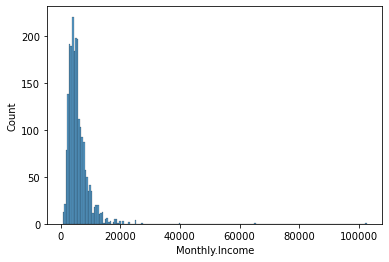

In [71]:
sns.histplot(ld_all.loc[ld_all['coming_from']=='train', 'Monthly.Income'])

In [73]:
ld_all.loc[(ld_all['coming_from']=='train') & (ld_all['Monthly.Income']>=30000),:] 

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,coming_from,Fico_Score,...,Loan_purpose_major_purchase,Loan_purpose_medical,Loan_purpose_moving,Loan_purpose_other,Loan_purpose_renewable_energy,Loan_purpose_small_business,Loan_purpose_vacation,Loan_purpose_wedding,LL_36 months,LL_60 months
516,4500.0,4500.0,6.91,0.58,65000.00,7.0,3015.0,4.0,train,727.0,...,1,0,0,0,0,0,0,0,1,0
803,35000.0,35000.0,16.29,17.17,39583.33,14.0,55965.0,2.0,train,707.0,...,0,0,0,0,0,0,0,0,1,0
1621,33000.0,33000.0,7.62,0.26,102750.00,7.0,95435.0,0.0,train,807.0,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:xlabel='Monthly.Income', ylabel='Count'>

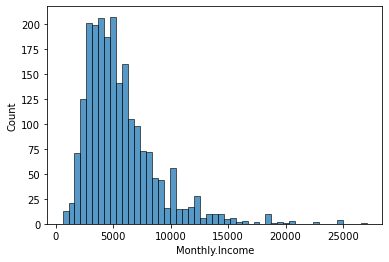

In [74]:
sns.histplot(ld_all.loc[(ld_all['coming_from']=='train') & (ld_all['Monthly.Income']<=30000), 'Monthly.Income'])

In [75]:
mean_monthly_Inc = ld_all.loc[ld_all['coming_from']=='train', 'Monthly.Income'].mean()

median_monthly_Inc = ld_all.loc[ld_all['coming_from']=='train', 'Monthly.Income'].median()

print(mean_monthly_Inc, median_monthly_Inc)

5727.459289940829 5000.0


<AxesSubplot:xlabel='Amount.Requested', ylabel='Count'>

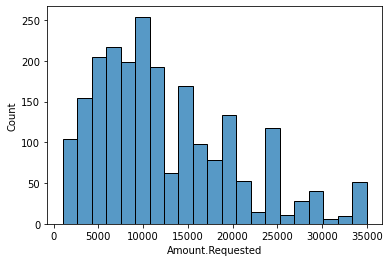

In [77]:
sns.histplot(ld_all.loc[ld_all['coming_from']=='train', 'Amount.Requested'])

In [78]:
mean_amnt_req = ld_all.loc[ld_all['coming_from']=='train', 'Amount.Requested'].mean()

median_amnt_req = ld_all.loc[ld_all['coming_from']=='train', 'Amount.Requested'].median()

print(mean_amnt_req, median_amnt_req)

12496.469248291573 10000.0


<AxesSubplot:xlabel='Amount.Funded.By.Investors', ylabel='Count'>

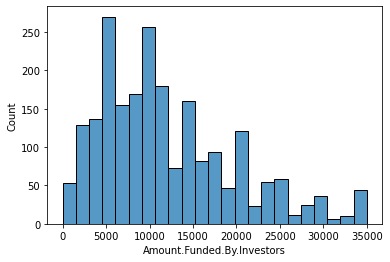

In [79]:
sns.histplot(ld_all.loc[ld_all['coming_from']=='train', 'Amount.Funded.By.Investors'])

In [80]:
mean_amnt_req_by_inves = ld_all.loc[ld_all['coming_from']=='train', 'Amount.Funded.By.Investors'].mean()

median_amnt_req_by_inves = ld_all.loc[ld_all['coming_from']=='train', 'Amount.Funded.By.Investors'].median()

print(mean_amnt_req_by_inves, median_amnt_req_by_inves)

12077.803406193085 10000.0


<AxesSubplot:xlabel='Debt.To.Income.Ratio', ylabel='Count'>

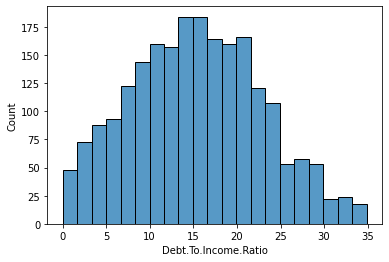

In [81]:
sns.histplot(ld_all.loc[ld_all['coming_from']=='train', 'Debt.To.Income.Ratio'])

<AxesSubplot:xlabel='Interest.Rate', ylabel='Count'>

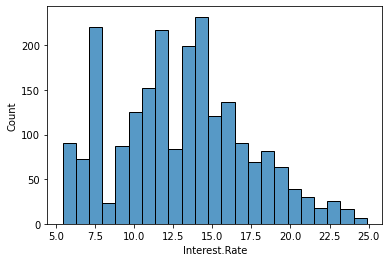

In [82]:
sns.histplot(ld_all.loc[ld_all['coming_from']=='train', 'Interest.Rate'])

In [ ]:
####### Missing value imputation ########

### Amt.Requested - Median - 10000
### Amt.Funded.By.Investors - Median - 10000
### Debt.To.Income.Ratio - Median 
### Monthly.Income - Median


In [83]:
####### Not a right thing #######

for col in ld_all.columns:
    if (col not in ['Interest.Rate','coming_from'])&(ld_all[col].isnull().sum()>0):
      median_val = ld_all.loc[ld_all['coming_from']=='train',col].median() ## computing only using training
      ld_all.loc[ld_all[col].isnull(), col] = median_val  ### replacing both train and test

In [84]:
ld_all.isnull().sum()

Amount.Requested                     0
Amount.Funded.By.Investors           0
Interest.Rate                      300
Debt.To.Income.Ratio                 0
Monthly.Income                       0
Open.CREDIT.Lines                    0
Revolving.CREDIT.Balance             0
Inquiries.in.the.Last.6.Months       0
coming_from                          0
Fico_Score                           0
HO_MORTGAGE                          0
HO_OWN                               0
HO_RENT                              0
Loan_purpose_car                     0
Loan_purpose_credit_card             0
Loan_purpose_debt_consolidation      0
Loan_purpose_educational             0
Loan_purpose_home_improvement        0
Loan_purpose_house                   0
Loan_purpose_major_purchase          0
Loan_purpose_medical                 0
Loan_purpose_moving                  0
Loan_purpose_other                   0
Loan_purpose_renewable_energy        0
Loan_purpose_small_business          0
Loan_purpose_vacation    

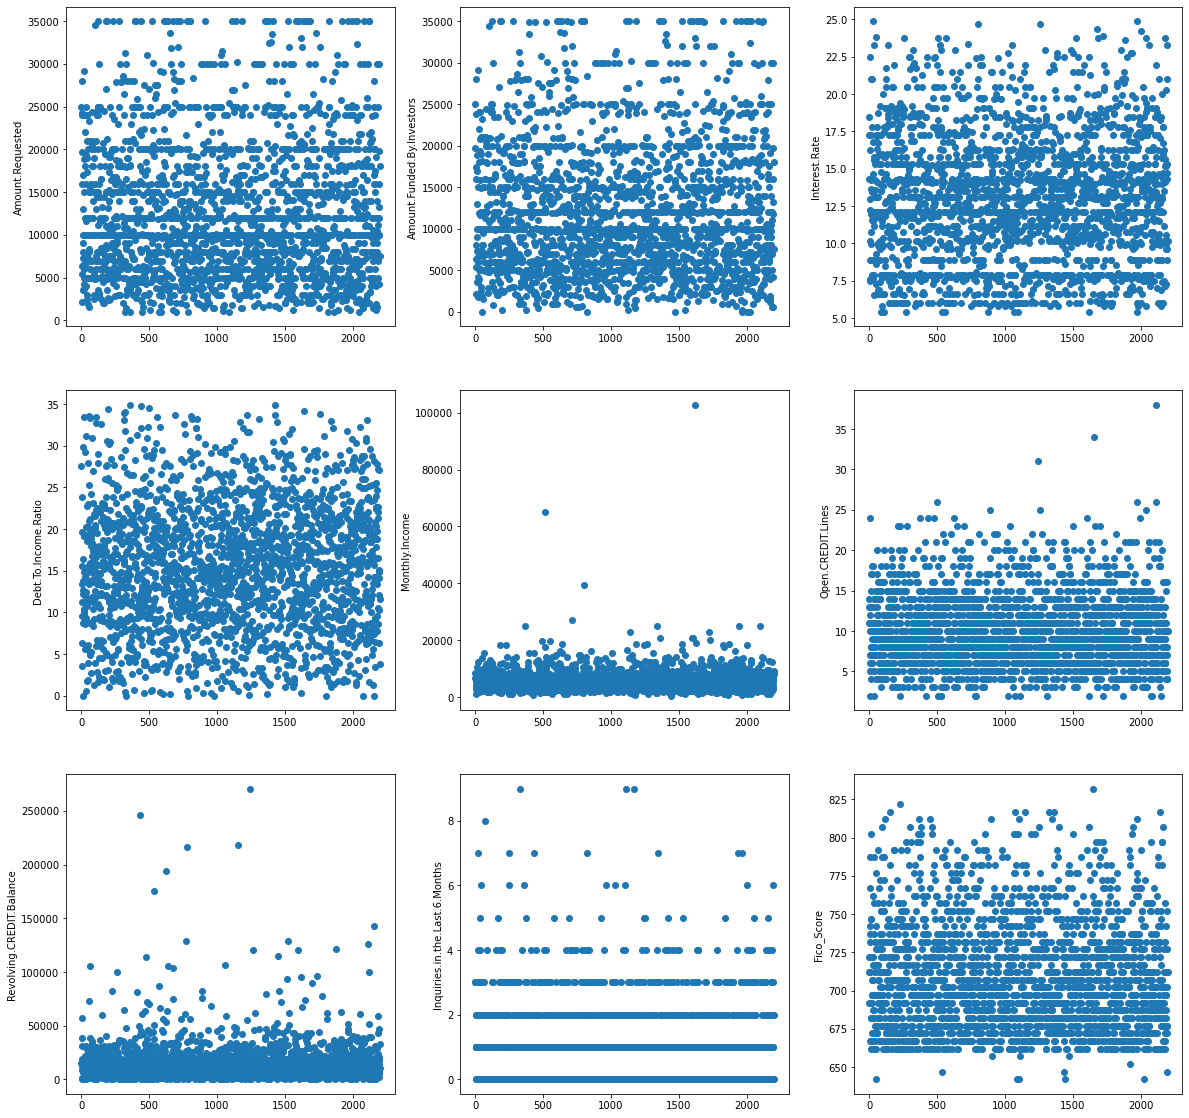

In [85]:
###### Finding outliers ##########

#### Visualizing numeric columns ######

genuine_numeric_cols = ['Amount.Requested', 'Amount.Funded.By.Investors','Interest.Rate', 'Debt.To.Income.Ratio',
                        'Monthly.Income', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
                        'Inquiries.in.the.Last.6.Months', 'Fico_Score']

numeric_cols = ld_all.loc[ld_all['coming_from']=='train',genuine_numeric_cols] ### selects numeric columns

column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 3
plot_cols = 3

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1

In [ ]:
###### Takeaway ##########

##### Monthly Income can be capped at 30000
##### Revolving Credit Balance can be capped at 150000

In [86]:
#### Capping of variables #######
ld_all.loc[ld_all['Monthly.Income']>=30000, 'Monthly.Income'] = 30000
ld_all.loc[ld_all['Revolving.CREDIT.Balance']>=150000, 'Revolving.CREDIT.Balance'] = 150000

In [ ]:
##### Monthly Income outlier treatment ####
'''
### Lets find it ####

ld_all.loc[(ld_all['data']=='train') & (ld_all['Monthly.Income']>60000),:]

###### Dropping the row with unusually high monthly income #####

ld_all.drop([516,1621],axis=0,inplace=True)
#ld_all.drop([516],axis=0,inplace=True)
#ld_all.loc[ld_all['Monthly.Income']>40000,'Monthly.Income'] = 40000
'''

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,data,Fico_Score,HO_MORTGAGE,HO_OWN,HO_RENT,Loan_purpose_car,Loan_purpose_credit_card,Loan_purpose_debt_consolidation,Loan_purpose_educational,Loan_purpose_home_improvement,Loan_purpose_house,Loan_purpose_major_purchase,Loan_purpose_medical,Loan_purpose_moving,Loan_purpose_other,Loan_purpose_small_business,Loan_purpose_vacation,Loan_purpose_wedding,loan_period
516,4500.0,4500.0,6.91,0.58,65000.0,7.0,3015.0,4.0,7.0,train,727.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1621,33000.0,33000.0,7.62,0.26,102750.0,7.0,95435.0,0.0,10.0,train,807.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
####### Converting all monthly incomes greater than 20000 to 20000  ######
'''
ld_all.loc[(ld_all['Monthly.Income']>20000) & (ld_all['data']=='train'), 'Monthly.Income'] = 20000
'''

In [87]:
##### find the correlations ######

#### High corrlation between target variable and features (good thing)
#### High correlation among features (bad) 

#numeric_cols.corr() ### features with >0.95 <-0.95 (remove one of these features)

genuine_numeric_cols = ['Amount.Requested', 'Amount.Funded.By.Investors','Interest.Rate', 'Debt.To.Income.Ratio',
                        'Monthly.Income', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
                        'Inquiries.in.the.Last.6.Months', 'Fico_Score']

numeric_cols_new = ld_all.loc[ld_all['coming_from']=='train', genuine_numeric_cols]

numeric_cols_new.corr()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Fico_Score
Amount.Requested,1.000000,0.966098,0.330082,0.073094,0.447075,0.194951,0.300023,-0.013203,0.083624
Amount.Funded.By.Investors,0.966098,1.000000,0.335200,0.087137,0.424931,0.185464,0.277462,-0.055585,0.072549
Interest.Rate,0.330082,0.335200,1.000000,0.177830,0.029569,0.091229,0.068946,0.169779,-0.708394
Debt.To.Income.Ratio,0.073094,0.087137,0.177830,1.000000,-0.178818,0.369016,0.192871,0.010945,-0.225485
Monthly.Income,0.447075,0.424931,0.029569,-0.178818,1.000000,0.215044,0.407527,0.039381,0.120259
Open.CREDIT.Lines,0.194951,0.185464,0.091229,0.369016,0.215044,1.000000,0.294741,0.111706,-0.091026
Revolving.CREDIT.Balance,0.300023,0.277462,0.068946,0.192871,0.407527,0.294741,1.000000,0.003500,-0.002772
Inquiries.in.the.Last.6.Months,-0.013203,-0.055585,0.169779,0.010945,0.039381,0.111706,0.003500,1.000000,-0.091786
Fico_Score,0.083624,0.072549,-0.708394,-0.225485,0.120259,-0.091026,-0.002772,-0.091786,1.000000


In [ ]:
###### Insight ######
#### Amount Requested and Amount Funded by Investors have very high correlation so one of them can be dropped
#### My model should be able to identify FICO SCore as a very important variable!!!

<AxesSubplot:>

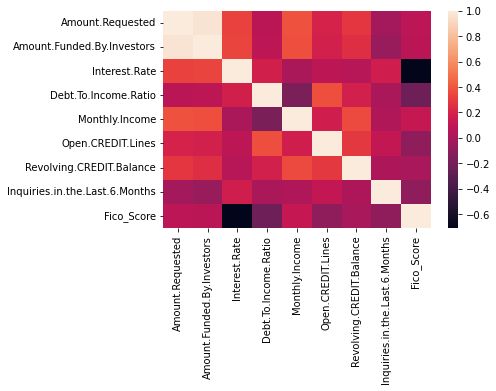

In [88]:
sns.heatmap(numeric_cols.corr())

In [89]:
########### Remove Amount.Funded.By.Investor #########

ld_all.drop(['Amount.Funded.By.Investors'], axis=1, inplace=True)

In [90]:
ld_all.shape

(2500, 28)

In [91]:
ld_all.dtypes

Amount.Requested                   float64
Interest.Rate                      float64
Debt.To.Income.Ratio               float64
Monthly.Income                     float64
Open.CREDIT.Lines                  float64
Revolving.CREDIT.Balance           float64
Inquiries.in.the.Last.6.Months     float64
coming_from                         object
Fico_Score                         float64
HO_MORTGAGE                          uint8
HO_OWN                               uint8
HO_RENT                              uint8
Loan_purpose_car                     uint8
Loan_purpose_credit_card             uint8
Loan_purpose_debt_consolidation      uint8
Loan_purpose_educational             uint8
Loan_purpose_home_improvement        uint8
Loan_purpose_house                   uint8
Loan_purpose_major_purchase          uint8
Loan_purpose_medical                 uint8
Loan_purpose_moving                  uint8
Loan_purpose_other                   uint8
Loan_purpose_renewable_energy        uint8
Loan_purpos

In [92]:
#### Seggregate the train and test back ######

ld_train = ld_all.loc[ld_all['coming_from']=='train']

del ld_train['coming_from']

ld_test = ld_all.loc[ld_all['coming_from']=='test']

ld_test.drop(['Interest.Rate','coming_from'],axis=1,inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6564\3076928046.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ld_test.drop(['Interest.Rate','coming_from'],axis=1,inplace=True)


In [93]:
ld_test.shape, ld_train.shape

((300, 26), (2200, 27))

In [94]:
del ld_all

**Modelling**

In [95]:
from sklearn.model_selection import train_test_split ### Help me to split the data into train and validation

In [96]:
ld_new_train, ld_val = train_test_split(ld_train, test_size=0.2, random_state=1235) ### random_state ensures we get the exact same split all the time

In [97]:
ld_new_train.shape, ld_val.shape

((1760, 27), (440, 27))

In [98]:
#### train_features - all columns from the train dataframe except the target column
#### train_targets - the target column from the train set
ld_new_train

,Amount.Requested,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Fico_Score,HO_MORTGAGE,HO_OWN,...,Loan_purpose_major_purchase,Loan_purpose_medical,Loan_purpose_moving,Loan_purpose_other,Loan_purpose_renewable_energy,Loan_purpose_small_business,Loan_purpose_vacation,Loan_purpose_wedding,LL_36 months,LL_60 months
1204,8000.0,15.95,20.16,4500.00,10.0,2786.0,1.0,667.0,0,0,...,0,0,0,0,0,0,0,0,0,1
776,5000.0,6.03,6.11,5416.67,13.0,4956.0,0.0,797.0,1,0,...,0,0,0,1,0,0,0,0,1,0
1546,10000.0,14.09,14.76,5000.00,7.0,4762.0,0.0,677.0,0,0,...,0,0,0,0,0,1,0,0,1,0
522,24000.0,15.81,0.62,10000.00,8.0,0.0,3.0,727.0,0,1,...,0,0,0,0,0,1,0,0,0,1
441,2400.0,10.37,9.54,3166.67,6.0,2174.0,0.0,677.0,1,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,18000.0,14.42,7.89,5833.33,5.0,18505.0,1.0,722.0,1,0,...,0,0,0,0,0,0,0,1,1,0
1351,15000.0,6.99,6.64,9083.33,12.0,1410.0,0.0,812.0,1,0,...,0,1,0,0,0,0,0,0,1,0
451,16000.0,11.11,9.90,2958.33,6.0,8943.0,2.0,767.0,0,0,...,0,0,0,0,0,0,0,0,0,1
239,8400.0,13.67,17.00,4583.33,14.0,20318.0,2.0,697.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [99]:
# Notice that only train data is used for imputing missing values in both train and test 

train_features = ld_new_train.drop('Interest.Rate',axis=1) ## this contains features for train

train_targets = ld_new_train['Interest.Rate'] ### this contains the actual value for train set

val_features = ld_val.drop('Interest.Rate',axis=1) ### this contains features for validation set

val_targets = ld_val['Interest.Rate']  ### this contains validation target

In [100]:
##### Importing the linear regression function ####

from sklearn.linear_model import LinearRegression #### This is a class 

In [ ]:
####### In order to use the classess ######

#### First thing is to initialize the class instance by calling the init method method
#### Use the instance to call any method inside the class

In [103]:
lm = LinearRegression() ## lm is an instance of linearRegression class

In [104]:
lm.fit(X = train_features,y = train_targets) ### fitting of model

LinearRegression()

In [105]:
lm.coef_

array([ 1.58962788e-04,  1.00406990e-03, -4.02191679e-05, -3.42216491e-02,
       -1.14226578e-06,  3.18832754e-01, -8.66336337e-02, -1.02741533e-01,
        1.50909577e-01, -4.81680437e-02,  3.83173712e-02, -5.39790012e-01,
       -4.82795838e-01, -2.09196047e-01, -2.69597284e-01,  4.10345420e-01,
       -1.73337108e-01,  3.57724560e-02,  1.19470905e+00,  4.73499534e-01,
       -3.63199621e-01, -8.21775236e-02,  6.01197080e-01, -6.33747482e-01,
       -1.59655370e+00,  1.59655370e+00])

In [106]:
lm.intercept_

73.95688714915873

In [107]:
model_parameters = dict(zip(train_features.columns, lm.coef_))

In [108]:
model_parameters

{'Amount.Requested': 0.00015896278753902622,
 'Debt.To.Income.Ratio': 0.0010040698958514358,
 'Monthly.Income': -4.021916794829269e-05,
 'Open.CREDIT.Lines': -0.03422164909031399,
 'Revolving.CREDIT.Balance': -1.14226577748904e-06,
 'Inquiries.in.the.Last.6.Months': 0.31883275445363135,
 'Fico_Score': -0.08663363367350553,
 'HO_MORTGAGE': -0.10274153307139619,
 'HO_OWN': 0.15090957677346425,
 'HO_RENT': -0.04816804370169225,
 'Loan_purpose_car': 0.038317371190114545,
 'Loan_purpose_credit_card': -0.5397900121243199,
 'Loan_purpose_debt_consolidation': -0.48279583769216927,
 'Loan_purpose_educational': -0.2091960466056856,
 'Loan_purpose_home_improvement': -0.2695972841974196,
 'Loan_purpose_house': 0.4103454199986949,
 'Loan_purpose_major_purchase': -0.17333710758794676,
 'Loan_purpose_medical': 0.035772455967854305,
 'Loan_purpose_moving': 1.1947090537660634,
 'Loan_purpose_other': 0.473499533634807,
 'Loan_purpose_renewable_energy': -0.3631996205159252,
 'Loan_purpose_small_business'

In [ ]:
########### R2 value ######
print(lm.score(train_features, train_targets))

print(lm.score(val_features, val_targets))

0.7683830134654827
0.7315561064598197


In [ ]:
##### Evaluate the performance of the fitted model #####

train_predictions = lm.predict(train_features) ### predict on the train features using the fitted model

val_predictions = lm.predict(val_features) ### predict on the val features using the fitted model

In [ ]:
train_predictions.shape, val_predictions.shape

((1760,), (440,))

In [ ]:
#### Q) Can you tell me some metric that would help me to understand my models performance

#### Average squared error - What is the sq error that my model is making on average
#### MAPE - Mean Absolute percentage error mean(abs((predicted value-actual value))/actual_value) -- On an average what is the percentage error that the model is making [0%-100%]

def MAPE(target_vector, predicted_vector):
  error_vect = (target_vector - predicted_vector)
  percent_error_vect = (error_vect/target_vector)*100
  percent_abs_error_vect = np.absolute(percent_error_vect)
  mean_abs_percentage_error = np.mean(percent_abs_error_vect)
  return(mean_abs_percentage_error)


In [ ]:
#### Has the model Overfit??? ######

train_MAPE = MAPE(train_targets,train_predictions)

val_MAPE = MAPE(val_targets,val_predictions)

print('Train MAPE : ', train_MAPE)

print('Val MAPE : ', val_MAPE)

### if 13% error is an accepatable error in interest rate predictions-- we would say that the model is perfectly fit

### if 13% error is too much in interest rate predictions- we would say that the model is undefit

Train MAPE :  13.795047832063137
Val MAPE :  13.173663343123176


In [ ]:
######### Feature importances are also provided for sklearn implementations of other algos #########

In [ ]:
####### Save the model #####

##### Models are saved in something known as pickle file ########

import pickle

with open('My_linear_regression_model.pickle', 'wb') as f: ##### wb indictes open the file in write mode
    pickle.dump(lm, f)

In [ ]:
###### Load the model #####

with open('My_linear_regression_model.pickle', 'rb') as f: ##### rb indicates open the file in read mode
   lm_model = pickle.load(f) 

In [ ]:
lm_model.coef_


array([ 1.70138773e-04, -5.25651871e-03, -4.99431780e-05, -3.37156546e-02,
       -2.79787675e-06,  3.09003395e-01,  2.29280121e-02, -8.78387650e-02,
       -3.23029959e+00, -2.97689958e+00, -3.07427089e+00, -1.49408236e+00,
       -1.90369270e+00, -1.65194677e+00, -1.11886492e+00, -1.53992384e+00,
       -8.96839116e-01, -1.48059783e+00, -1.67406755e+00, -5.89951495e-02,
       -8.01932374e-01, -1.52286742e+00, -5.81949995e-01, -2.14112197e+00,
        3.08729609e+00])